# Análisis de variables para predicción de la generación de una planta solar

## Lecturas de Datos

In [256]:
#Importaciones iniciales
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [257]:
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Estacionaria.xlsx")
datosGeneracion_sel = datosGeneracion.copy()
datosGeneracion_sel = datosGeneracion_sel.drop(columns = ['Fecha', 'DesCondCielo', 'DesDirViento'])

In [258]:
#Normalizamos la información
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datosGeneracion_sel)
datosGeneracion_scaled = pd.DataFrame(scaled, columns = datosGeneracion_sel.columns, index=datosGeneracion_sel.index)

In [290]:
#Eliminamos los vacíos
datosGeneracion_dropna = datosGeneracion_scaled.dropna()
datosGeneracion_dropna.sample(4).to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\n & Anio & Mes & NumMes & NumSemana & NumDiaAnio & Dia & NumDia & Hora & NumHora & Generacion & Temperatura & ProbabilidadLluvia & HumedadRelativa & VelocidadViento & DireccionViento & CoberturaNubes & IndiceUV & CodCondCielo & CodDirViento & VelocidadRafaga & Precipitacion & DPT & Generacion_diff & Temperatura_diff & ProbabilidadLluvia_diff & HumedadRelativa_diff & VelocidadViento_diff & DireccionViento_diff & IndiceUV_diff & VelocidadRafaga_diff & Precipitacion_diff & DPT_diff \\\\\n\\midrule\n11554 & 0.500000 & 0.600000 & 0.818182 & 0.826923 & 0.825000 & 0.611884 & 0.900000 & 0.611164 & 0.043478 & 0.000000 & 0.472527 & 0.000000 & 0.430000 & 0.149515 & 0.701950 & 0.130000 & 0.000000 & 0.000000 & 0.625000 & 0.238462 & 0.000000 & 0.370310 & 0.500199 & 0.494737 & 0.503106 & 0.345238 & 0.660804 & 0.737374 & 0.444444 & 0.638031 & 0.563265 & 0.418841 \\\\\n8544 & 0.500000 & 0.440000 & 0.454545 & 0.480769 & 0.480556 & 0.452592 

## Selección de características

Se usará el PCA para elegir qué variables vamos a utilizar para el ejercicio

In [260]:
y = datosGeneracion_dropna[['Generacion_diff']]
x = datosGeneracion_dropna[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

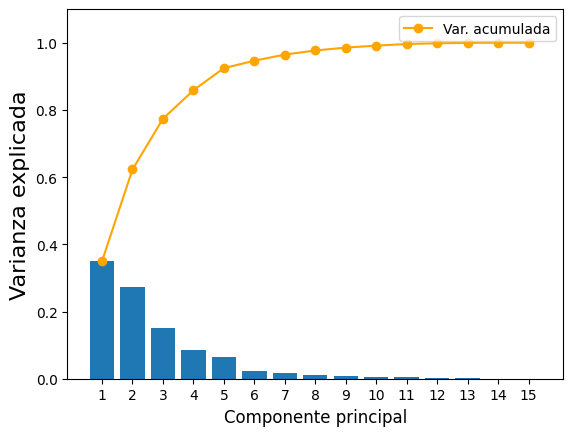

In [261]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
datos = pca.fit_transform(x)

plt.figure()
plt.bar(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_)
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, 16),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

In [262]:
# Coeficientes del PCA
pca_coef = pd.DataFrame(
  data    = pca.components_,
  columns = x.columns,
  index = ['pca1', 'pca2', 'pca3','pca4', 'pca5', 'pca6','pca7', 'pca8', 'pca9','pca10', 'pca11', 'pca12', 'pca13', 'pca14','pca15']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
CoberturaNubes,0.611825,0.400882,0.356248,-0.545924,-0.192377,0.034830,0.002226,0.016640,-0.007049,0.005927,0.037767,0.001293,-0.000534,-0.001013,-0.000534
CodCondCielo,0.554651,0.366207,-0.242913,0.606950,0.354691,0.035775,0.021431,-0.051318,-0.018289,0.006491,-0.017024,0.002971,0.000884,0.001668,0.001156
NumSemana,0.360657,-0.588830,0.138139,0.029848,0.085918,-0.016479,0.003087,-0.001832,-0.006273,0.003079,-0.002026,-0.001431,-0.000575,0.006748,0.703893
NumDiaAnio,0.353739,-0.580870,0.152141,0.036609,0.090815,-0.017684,0.006664,-0.004405,-0.006774,-0.001701,-0.001563,-0.000433,-0.000037,-0.006810,-0.710106
HumedadRelativa_diff,0.038502,0.033202,0.016175,0.068162,-0.119754,-0.755157,-0.007789,-0.110334,0.321279,0.176259,0.041728,-0.509418,-0.011004,0.003716,-0.000201
ProbabilidadLluvia_diff,0.020596,0.018788,-0.003719,0.046146,0.032446,-0.177614,-0.128636,0.966870,-0.079673,-0.036795,0.070322,0.000308,-0.021043,0.001796,-0.001482
DPT_diff,0.012751,0.012725,0.008464,0.024291,-0.065161,-0.359617,0.014876,-0.031533,-0.041414,0.564087,-0.177273,0.713620,0.059886,0.007209,-0.001108
VelocidadRafaga_diff,0.003595,0.003424,-0.001593,-0.018811,0.051502,-0.013770,-0.732724,-0.092831,-0.047106,-0.035756,0.015141,-0.017564,0.668352,0.023283,-0.001437
VelocidadViento_diff,0.003474,0.003693,-0.000796,-0.013221,0.036907,-0.027161,-0.656047,-0.113341,-0.059964,0.012438,-0.003293,0.046907,-0.740224,-0.023654,-0.001413
Precipitacion_diff,0.000731,0.000652,-0.000237,0.001939,0.000752,-0.006871,-0.002123,0.001800,0.009981,-0.003736,-0.002979,0.006745,0.033350,-0.999283,0.009613


In [263]:
#Seleccionamos las variables elegidas
x = datosGeneracion_dropna[['NumSemana', 'NumDiaAnio', 'Hora', 'HumedadRelativa_diff', 'CoberturaNubes',
                                 'CodCondCielo', 'CodDirViento']]

In [295]:
datosGeneracion_dropna[['Generacion_diff','NumSemana', 'NumDiaAnio', 'Hora', 'HumedadRelativa_diff', 'CoberturaNubes',
                                 'CodCondCielo', 'CodDirViento']].sample(4).to_latex(index=False)

'\\begin{tabular}{rrrrrrrr}\n\\toprule\nGeneracion_diff & NumSemana & NumDiaAnio & Hora & HumedadRelativa_diff & CoberturaNubes & CodCondCielo & CodDirViento \\\\\n\\midrule\n0.504568 & 0.884615 & 0.866667 & 0.632260 & 0.488095 & 0.010000 & 0.000000 & 0.875000 \\\\\n0.241006 & 0.500000 & 0.497222 & 0.460175 & 0.517857 & 0.500000 & 0.500000 & 0.375000 \\\\\n0.533276 & 0.923077 & 0.911111 & 0.191340 & 0.666667 & 0.250000 & 0.500000 & 0.250000 \\\\\n0.500199 & 0.923077 & 0.905556 & 0.649358 & 0.315476 & 0.580000 & 0.000000 & 0.625000 \\\\\n\\bottomrule\n\\end{tabular}\n'

## División de datos

Se dividirá la información en un 70-30, donde el 30% está compuesto en los últimos registros, para simular la predicción de pronósticos.

In [264]:
x_train = x.loc[:13245,]
y_train = y.loc[:13245,]

x_test = x.loc[13246:,]
y_test = y.loc[13246:,]

## Selección del mejor modelo

In [265]:
#Importaciones de todos los modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
import xgboost
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [266]:
def fit(x, y, reg_model = 'RF', n_components = 6, n_jobs = None):
    match reg_model:
        case 'AdaBoost':
            model = AdaBoostRegressor()
        case 'Bagging':
            model = BaggingRegressor(n_jobs = n_jobs)
        case 'BayesRidge':
            model = BayesianRidge()
        case 'Boosting':
            model = GradientBoostingRegressor()
        case 'DecisionTree':
            model = DecisionTreeRegressor(max_depth = 2)
        case 'LassoReg':
            model = Lasso(alpha = 0.1)
        case 'LinearReg':
            model = LinearRegression(n_jobs = n_jobs)
        case 'PLS':
            model = PLSRegression(n_components = n_components)
        case 'PCR':
            model = make_pipeline(PCA(n_components = n_components), LinearRegression(n_jobs = n_jobs))
        case 'RidgeReg':
            model = Ridge(alpha = 0.1)
        case 'RF':
            model = RandomForestRegressor(n_jobs = n_jobs)
        case 'XGBoost':
            model = xgboost.XGBRegressor(n_jobs = n_jobs)
    model.fit(x, y)
    return model

In [268]:
#Datos de Entrenamiento
#Procesamos los modelos
from tqdm import tqdm
import multiprocessing
from timeit import default_timer as timer
#Librerías de las métricas
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

models_ed = ['AdaBoost', 'Bagging', 'BayesRidge', 'Boosting', 'DecisionTree', 'LassoReg', 'LinearReg', 
             'PLS', 'PCR', 'RidgeReg', 'RF', 'XGBoost']
n_jobs = multiprocessing.cpu_count()
results_ed = {
        'model' : [],
        'mse' : [],
        'rmse' : [],
        'mae' : [],
        'r2' : [],
        'mape' : [],
        'time' : []
}

for k in tqdm(range(30)):
        for m in models_ed:
                start = timer()
                model = fit(x_train, y_train.Generacion_diff.ravel(), m, n_jobs = n_jobs)
                end = timer()
                y_pred = model.predict(x_test)
                results_ed['model'].append(m)
                results_ed['mse'].append(mse(y_test, y_pred))
                results_ed['rmse'].append(np.sqrt(mse(y_test, y_pred)))
                results_ed['mae'].append(mae(y_test, y_pred))
                results_ed['r2'].append(r2(y_test, y_pred))
                results_ed['mape'].append(mape(y_test, y_pred))
                results_ed['time'].append(end - start)

        df_results_ed = pd.DataFrame(results_ed)
        df_results_ed.to_csv('./Resultados_modelos_articulo.csv')

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [07:03<00:00, 14.13s/it]


## Métricas de desempeño

### RMSE

In [269]:
df_results_ed = df_results_ed.replace({'model': 'LassoReg'}, {'model': 'Lasso'})
df_results_ed = df_results_ed.replace({'model': 'AdaBoost'}, {'model': 'Ada Boost'})
df_results_ed = df_results_ed.replace({'model': 'BayesRidge'}, {'model': 'Bayes Ridge'})
df_results_ed = df_results_ed.replace({'model': 'DecisionTree'}, {'model': 'Decision Tree'})
df_results_ed = df_results_ed.replace({'model': 'LinearReg'}, {'model': 'Linear Regression'})
df_results_ed = df_results_ed.replace({'model': 'RidgeReg'}, {'model': 'Ridge'})
df_results_ed = df_results_ed.replace({'model': 'RF'}, {'model': 'Random Forest'})

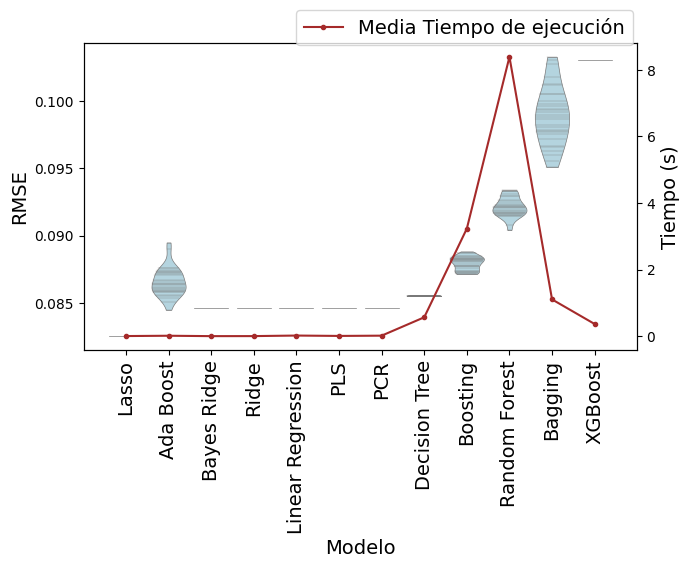

In [270]:
df_results_ed = df_results_ed.sort_values('rmse')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('rmse')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
ax = plt.gca()
sns.violinplot(x="model", y="rmse", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Modelo', fontsize = 14)

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 14)
plt.tight_layout()
plt.show()

### MAE

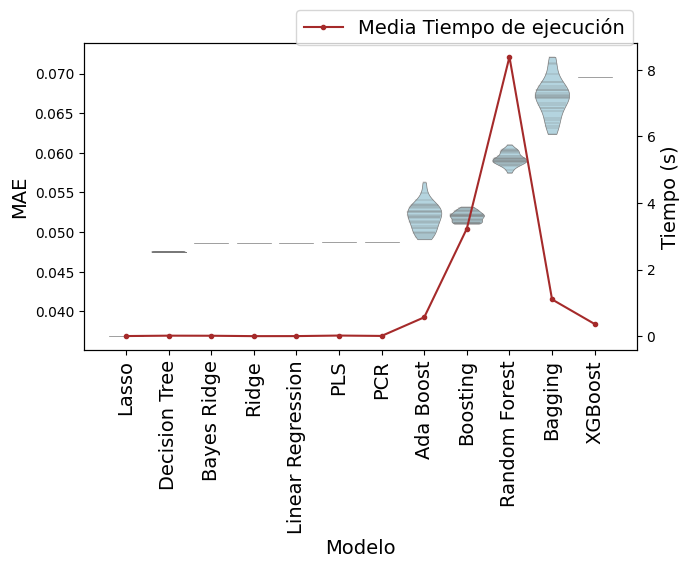

In [271]:
df_results_ed = df_results_ed.sort_values('mae')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mae')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
ax = plt.gca()
sns.violinplot(x="model", y="mae", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Modelo', fontsize = 14)

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 14)
plt.tight_layout()
plt.show()

### R2

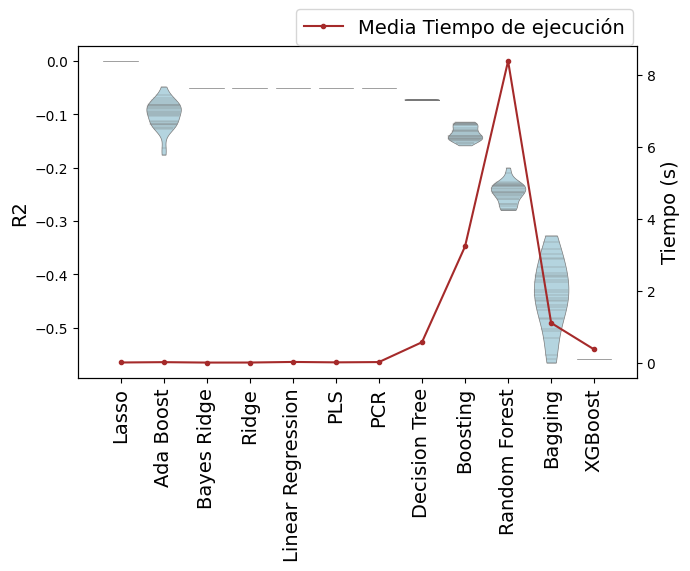

In [296]:
df_results_ed = df_results_ed.sort_values('r2', ascending=False)
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('r2', ascending=False)
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
ax = plt.gca()
sns.violinplot(x="model", y="r2", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('R2', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 14)
plt.tight_layout()
plt.show()

### MAPE

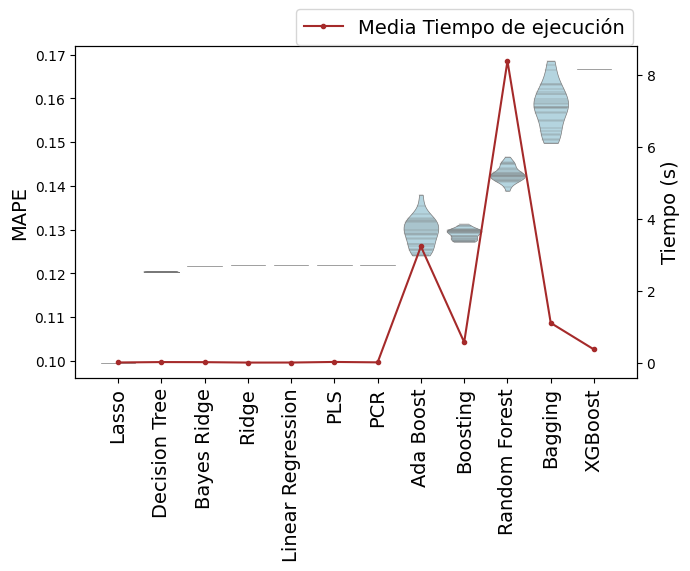

In [297]:
df_results_ed = df_results_ed.sort_values('mape')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mape')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
ax = plt.gca()
sns.violinplot(x="model", y="mape", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 14)
plt.tight_layout()
plt.show()

## Métodos elegidos: Lasso, Decision Tree, BayesianRidge

### Evaluación de hiperparámetros Lasso

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# Crea el modelo Lasso
lasso_model = Lasso()

# Define los parámetros de la búsqueda en cuadrícula
parametros = {'alpha': alphas}

# Realiza la búsqueda en cuadrícula
grid_search_lasso = GridSearchCV(lasso_model, parametros, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(x_train, y_train)

# Imprime los mejores hiperparámetros
print("Mejor valor de alpha:", grid_search_lasso.best_params_['alpha'])


Mejor valor de alpha: 0.001


### Evaluación de hiperparámetros DecisionTree

In [275]:
from sklearn.tree import DecisionTreeRegressor

# Supongamos que tienes tus datos X_train, y_train

# Define los hiperparámetros a probar
parametros = {
    'max_depth': [None, 2, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crea el modelo DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

# Realiza la búsqueda en cuadrícula
grid_search_dt = GridSearchCV(dt_model, parametros, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(x_train, y_train)

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search_dt.best_params_)


Mejores hiperparámetros: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


### Evaluación de hiperparámetros BayesianRidge

In [276]:
from sklearn.linear_model import BayesianRidge

# Define los hiperparámetros a probar
parametros = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}

# Crea el modelo BayesianRidge
bayesian_ridge_model = BayesianRidge()

# Realiza la búsqueda en cuadrícula
grid_search_br = GridSearchCV(bayesian_ridge_model, parametros, cv=5, scoring='neg_mean_squared_error')
grid_search_br.fit(x_train, y_train)

# Imprime los mejores hiperparámetros
best_params = grid_search_br.best_params_
print("Mejores hiperparámetros:", best_params)


Mejores hiperparámetros: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-06}


### Aplicando los mejores hiperparámetros método Lasso

In [277]:
y_pred_Lasso = grid_search_lasso.predict(x_test)

In [278]:
df_y_pred = pd.DataFrame(y_pred_Lasso, index = y_test.index, columns = ['Generacion_diff'])
df_y_pred

,Generacion_diff
13246,0.511326
13247,0.511510
13248,0.512060
13249,0.512244
13250,0.512794
...,...
18941,0.495976
18942,0.497628
18943,0.497628
18944,0.499096


In [279]:
#Indicamos las filas que han sido predecidas por el método Bagging
datosGeneracion['predecidaLasso'] = 0
datosGeneracion.loc[df_y_pred.index, 'predecidaLasso'] = 1

In [280]:
#Igualamos la predición con la generación
datosGeneracion['prediccion_diff_Lasso'] = datosGeneracion_scaled['Generacion_diff']

In [281]:
#Asignamos los datos de predicción a la columna
datosGeneracion.loc[df_y_pred.index, 'prediccion_diff_Lasso'] = df_y_pred['Generacion_diff']

In [282]:
#Obtenemos el máximo y el mínimo para desecalar
max_value = datosGeneracion_dropna["Generacion_diff"].max()
min_value = datosGeneracion_dropna["Generacion_diff"].min()

In [283]:
#Desescalamos
datosGeneracion["Prediction_Lasso"] = round((datosGeneracion["prediccion_diff_Lasso"] * (max_value - min_value)) + min_value, 2)

In [284]:
#Inicializamos la columna de predicción final con 0
datosGeneracion['Prediction_final_Lasso'] = 0

In [285]:
#Pasamos los primeros 24 registros de la generación original a las columnas predictivas
datosGeneracion.loc[0:24, 'Prediction_Lasso'] = datosGeneracion.loc[0:24, 'Generacion']
datosGeneracion.loc[0:24, 'Prediction_final_Lasso'] = datosGeneracion.loc[0:24, 'Generacion']

In [286]:
#Desdiferenciamos topando mínimo con 0 y máximo con 30000
for i in range(24, len(datosGeneracion)):
    datosGeneracion['Prediction_final_Lasso'][i] = min(max(datosGeneracion['Prediction_Lasso'][i] + datosGeneracion["Prediction_final_Lasso"][i-24], 0), 30000)

In [287]:
#Condicionamos a que haya valores si el Índice UV tiene valor
datosGeneracion['Prediction_UV_Lasso'] = datosGeneracion['Prediction_final_Lasso']
datosGeneracion.loc[(datosGeneracion['IndiceUV'] == 0), 'Prediction_UV_Lasso'] = 0

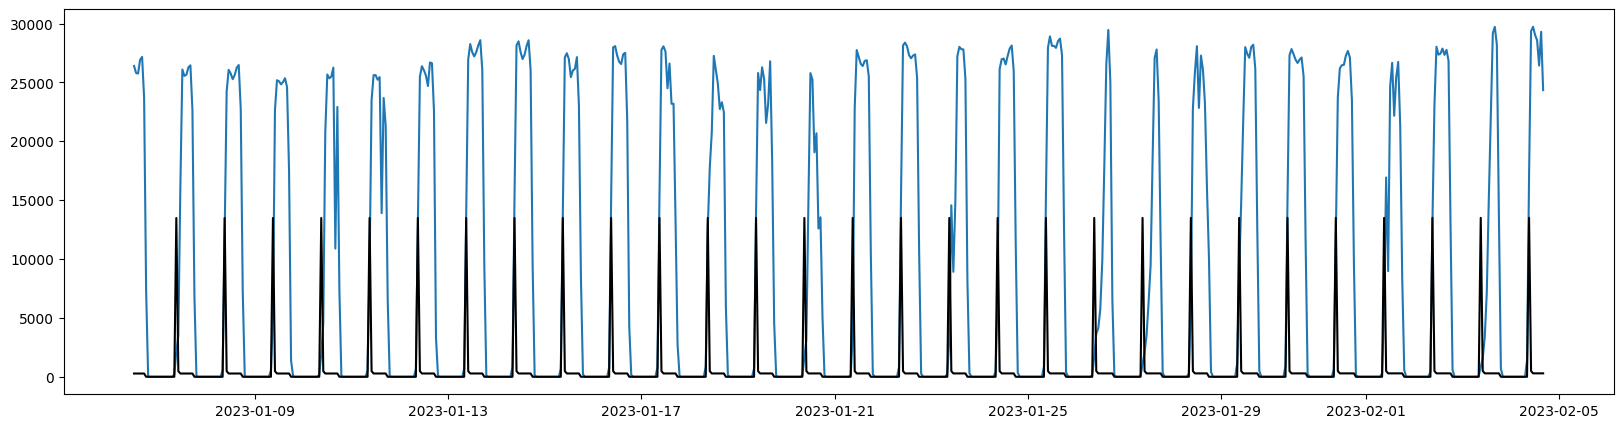

In [289]:
plt.figure(figsize=(20,5))
fin = 13246 + 700
plt.plot(datosGeneracion.loc[13246:fin, "Fecha"], datosGeneracion.loc[13246:fin, "Generacion"])
plt.plot(datosGeneracion.loc[13246:fin, "Fecha"], datosGeneracion.loc[13246:fin, "Prediction_UV_Lasso"], c = 'black')